**1. Download the two following excerpts from the National Health and Nutrition
Examination Survey (NHANES dataset):**

• nhanes_adult_male_bmx_2020.csv

• nhanes_adult_female_bmx_2020.csv

**They give body measurements of adult males and females.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the csv file
male_bmx = '/content/drive/MyDrive/Minor /nhanes_adult_male_bmx_2020.csv'
female_bmx = '/content/drive/MyDrive/Minor /nhanes_adult_female_bmx_2020.csv'

**2. Read the two files as numpy matrices named male and female.**

In [4]:
#Read the two files as numpy matrices named male and female
male = np.genfromtxt(male_bmx, delimiter=',', skip_header=1)
female = np.genfromtxt(female_bmx, delimiter=',', skip_header=1)

**3. On a single plot (use matplotlib.pytplot.subplot), draw two histograms: for female weights (top subfigure). and for male weights (bottom subfigure) Call matplotlib.pyplot.xlim to make the xaxis limits identical for both subfigures (work out the appropriate limits yourself).**

In [5]:
#
male_weights = male[:,0]
female_weights = female[:,0]
x_min = min(male_weights.min(), female_weights.min())
x_max = max(male_weights.max(), female_weights.max())

Text(0.5, 1.0, 'Male Weights')

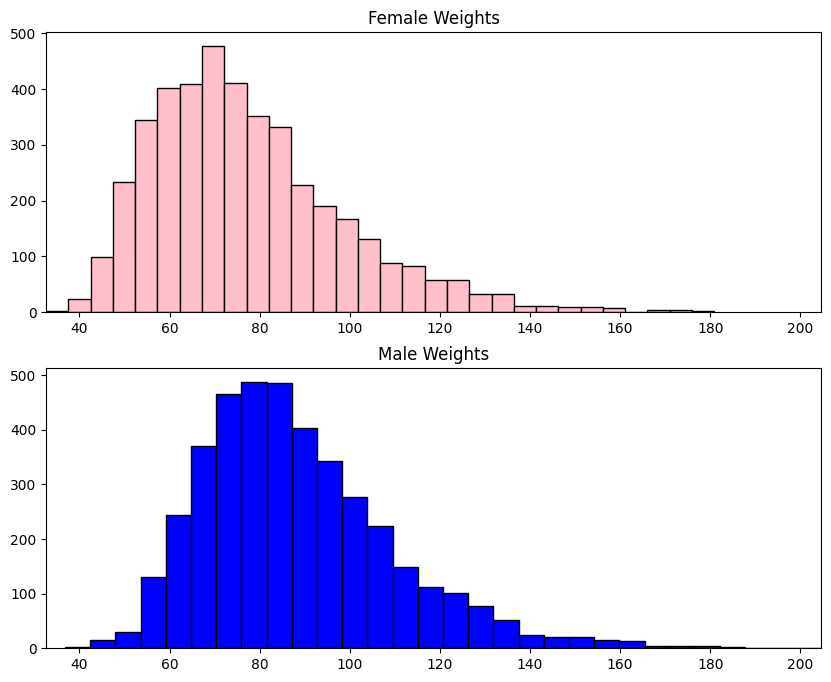

In [6]:
#
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ax1.hist(female_weights, bins=30, color='pink', edgecolor='black')
ax1.set_xlim(x_min, x_max)
ax1.set_title('Female Weights')
ax2.hist(male_weights, bins=30, color='blue', edgecolor='black')
ax2.set_xlim(x_min, x_max)
ax2.set_title('Male Weights')

**4. Call matplotlib.pyplot.boxplot to draw a box-and-whisker plot, with two boxes side by side, giving the male and female weights so that they can be compared to each other. Note that the boxplot function can be fed with a list of two vectors like [female_weights, male_weights]. In your own words, discuss the results.**

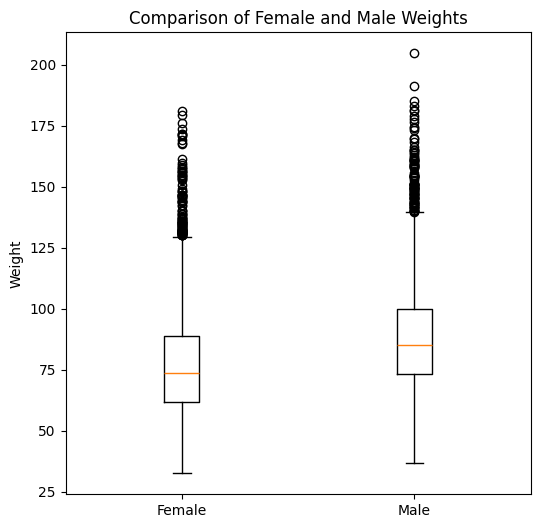

In [7]:
plt.figure(figsize=(6, 6))
plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'])
plt.title('Comparison of Female and Male Weights')
plt.ylabel('Weight')
plt.show()

 **Results from a box-and-whisker plot are :**

**• Higher Median and Mean Weight in Males:**
On average, males tend to weigh more than females.

**• Greater Variability in Male Weights:** Males exhibit a broader range of weights, indicating greater diversity in body weight.

**• Fewer Female Outliers:** There are fewer extreme weights among females, suggesting more uniformity in the female weight data.



**5. Compute the basic numerical aggregates of the male and female weights (measures of location, dispersion, and shape). In your own words, describe and compare the two distributions (e.g., are they left skewed, which one has more dispersion, and so forth)**



**• Measure of Location**

In [8]:
# Measures of Location for male weights
mean_value = np.mean(male_weights)
median_value = np.median(male_weights)
print("Mean of Male Weights:",mean_value)
print("Median of Male Weights:",median_value)

# Measures of Location for female weights
mean_value = np.mean(female_weights)
median_value = np.median(female_weights)
print("Mean of Female Weights:",mean_value)
print("Median of Female Weights:",median_value)

Mean of Male Weights: 88.36454300416565
Median of Male Weights: 85.0
Mean of Female Weights: 77.39912322274881
Median of Female Weights: 73.6


**The mean weight for males (88.36) is higher than the mean weight for females (77.40). This suggests that, on average, males weigh more than females.**

**The median weight for males (85.0) is also higher than the median weight for females (73.6) indicating that the central value of male weights is higher than that of female weights.**

**Both the mean and median weights are higher for males compared to females. Thus, males have a higher measure of location in terms of both the average and the central value of the data distribution.**

**• Measure of Dispersion**

In [9]:
# Measures of Dispersion for male weights
variance = np.var(male_weights)
std_deviation = np.std(male_weights)
print("Variance of Male Weights:",variance)
print("Standard Deviation of Male Weights:",std_deviation)

# Measures of Dispersion for female weights
variance = np.var(female_weights)
std_deviation = np.std(female_weights)
print("Variance of Female Weights:",variance)
print("Standard Deviation of Female Weights:",std_deviation)

Variance of Male Weights: 458.770850128082
Standard Deviation of Male Weights: 21.418936717962495
Variance of Female Weights: 464.09768406538484
Standard Deviation of Female Weights: 21.542926543656616


**The variance for female is slightly higher than the variance for male weights. This indicates that female weights have a slightly greater spread around the mean compared to male weights.**

**Similarly, the standard deviation for female weights is slightly higher than male weights. This also suggests a slightly higher dispersion in female weights.**

**Both the variance and the standard deviation are marginally higher for female weights compared to male weights.This means that there is a bit more variability in the weights of females compared to males.**

**• Measure of Shape**

In [10]:
# Measures of Shape for male weights
# Skewness and Kurtosis
from scipy.stats import skew, kurtosis
male_skew = skew(male_weights)
male_kurtosis = kurtosis(male_weights)
print("Skewness of Male Weights:", male_skew)
print("Kurtosis of Male Weights:", male_kurtosis)

female_skew = skew(female_weights)
female_kurtosis = kurtosis(female_weights)
print("Skewness of Female Weights:",female_skew)
print("Kurtosis of Female Weights:", female_kurtosis)

Skewness of Male Weights: 0.9842810741662347
Kurtosis of Male Weights: 1.4742884754078238
Skewness of Female Weights: 1.0340146022703682
Kurtosis of Female Weights: 1.4023996160487355


**In Skewness both the male and female weight distributions are right-skewed.**

**The female distribution has a slightly higher skewness, suggesting a greater occurrence of higher weights compared to the male distribution. This comparison shows that while both genders have similar skewness patterns, the degree of skewness is more pronounced in females.**


**In Kurtosis both of these values indicate that the distributions of both male and female weights are leptokurtic.**

**Male Weights is slightly higher suggesting that the male weight distribution has slightly more extreme values and a sharper peak. While Female Weights still indicating a leptokurtic distribution, is slightly lower than that of males, suggesting fewer extreme values and a slightly less sharp peak.**

**6. To the female matrix, add the eight column which gives the body mass indices of all the female participants.**

In [11]:
# Get female heights and weights from the matrix
female_heights = female[:, 1]
female_weights = female[:, 0]

# Convert heights from centimeters to meters
female_heights_m = female_heights / 100

# Calculate BMI
female_bmi = female_weights / (female_heights_m ** 2)

# Add the BMI as the eighth column to the female matrix
female_with_bmi = np.hstack((female, female_bmi.reshape(-1, 1)))
# Save the updated matrix back to the same CSV file

female = np.savetxt(female_bmx, female_with_bmi, delimiter=',', comments='', fmt='%f')

# Print the first few rows to verify
print("First few rows of the updated female matrix:\n", female_with_bmi[:5])

First few rows of the updated female matrix:
 [[ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972     39.06972037]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.092655    28.09265496]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.904378    24.90437849]
 [ 55.4        154.6         34.6         34.          28.3
   92.5         73.2         23.178791    23.17879132]
 [ 62.         144.7         32.5         34.2         29.8
  106.7         84.8         29.611106    29.61110588]]


**7. Create a new matrix zfemale being a version of the female dataset with all its columns standardised (by computing the z-scores of each column).**

In [12]:
from scipy.stats import zscore
zfemale = zscore(female_with_bmi, axis=0)
# Verify the shape of the new matrix
print("Shape of zfemale matrix:", zfemale.shape)
# Print the first few rows to verify
print("First few rows of the standardized female matrix:\n", zfemale[:5])

Shape of zfemale matrix: (4220, 9)
First few rows of the standardized female matrix:
 [[ 0.63598029 -1.05294157 -1.07897923 -1.29326664  1.03226339  1.04503344
   0.26536111  1.15641023  1.15641028]
 [-0.20420267  0.15053717  0.58338189  0.26222137 -0.16215519 -0.19039412
  -0.37267915 -0.25903858 -0.25903858]
 [-0.72873679 -0.38748862  0.83912975 -0.76440072 -0.66131519 -0.52325543
  -0.45890081 -0.6701542  -0.67015414]
 [-1.02117617 -0.78392867 -0.61010815 -0.98216904 -0.78610519 -1.06735566
  -1.45332392 -0.89266177 -0.89266173]
 [-0.71481111 -2.18562744 -1.50522567 -0.91994952 -0.51869804 -0.15838823
  -0.7865431  -0.06324037 -0.06324039]]


**8. Draw a scatterplot matrix (pairplot) for the standardised versions of height, weight, waist circumference, hip circumference, and BMI of the females (based on zfemale). Compute Pearson’s and Spearman’s correlation coefficients for all pairs of variables. Interpret the obtained results.**

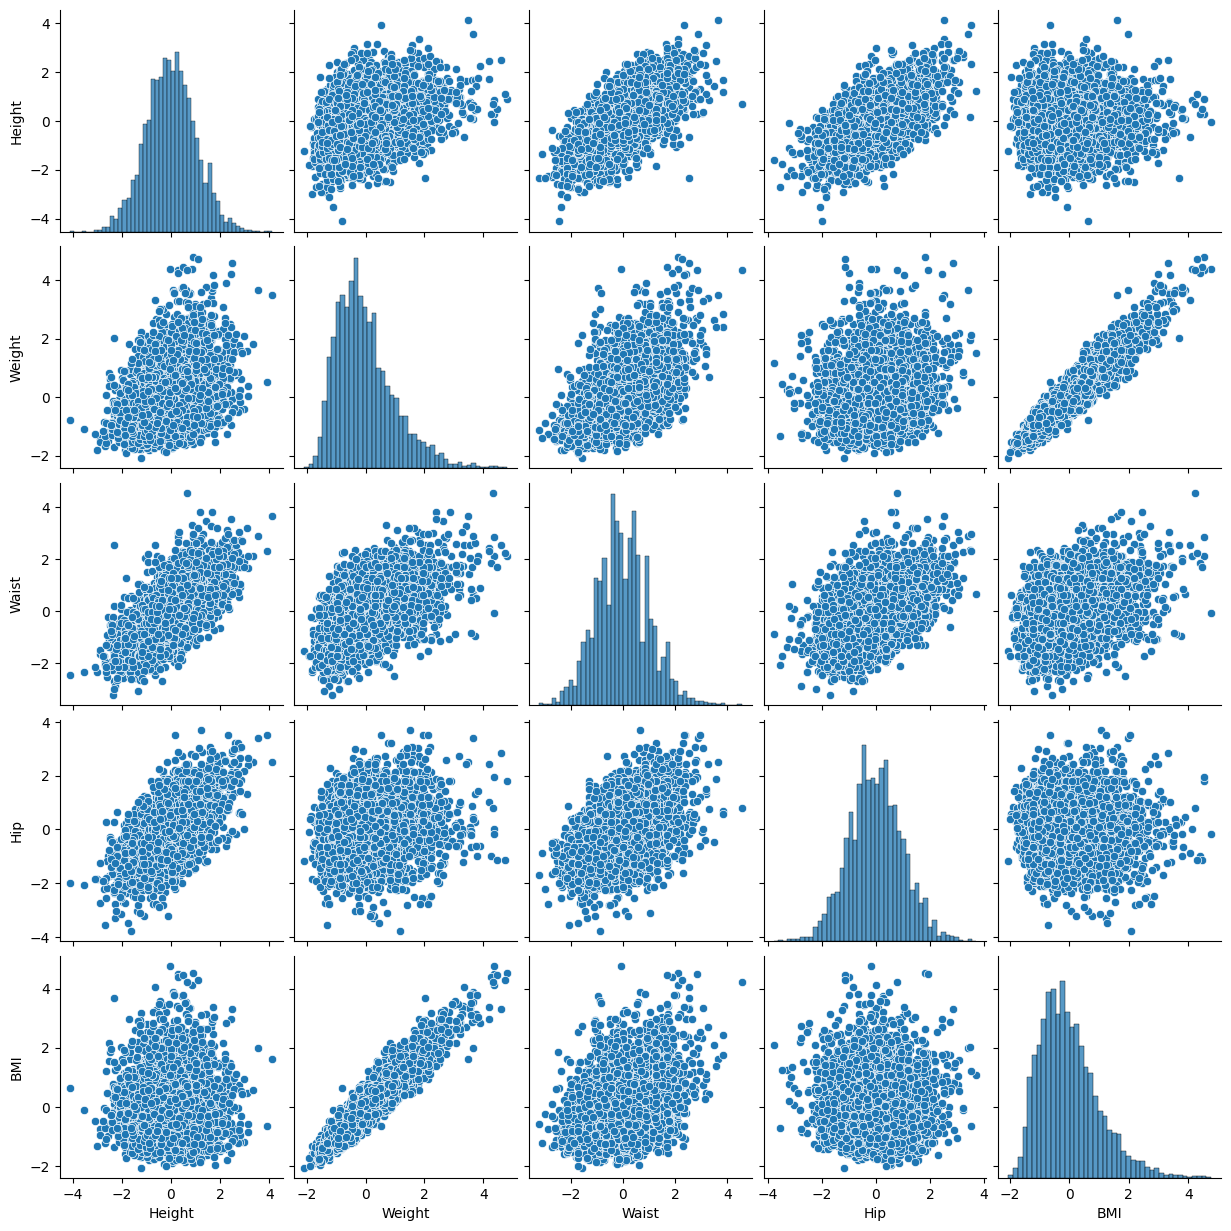

In [13]:
zfemale_subset = zfemale[:, [1, 0, 2, 3, 7]]
# Select columns for height, weight, waist, hip, bmi

# Create a Pandas DataFrame for easier handling
df = pd.DataFrame(zfemale_subset,columns=['Height', 'Weight', 'Waist', 'Hip', 'BMI'])
sns.pairplot(df)
plt.show()

In [14]:
from scipy.stats import pearsonr, spearmanr
pearson_corr = df.corr(method='pearson')
print("Pearson's Correlation Coefficients:\n", pearson_corr)

# Calculate Spearman's correlation coefficients
spearman_corr = df.corr(method='spearman')
print("\nSpearman's Correlation Coefficients:\n", spearman_corr)

Pearson's Correlation Coefficients:
           Height    Weight     Waist       Hip       BMI
Height  1.000000  0.345529  0.667937  0.657300  0.033079
Weight  0.345529  1.000000  0.551762  0.192989  0.945890
Waist   0.667937  0.551762  1.000000  0.475888  0.364851
Hip     0.657300  0.192989  0.475888  1.000000 -0.015090
BMI     0.033079  0.945890  0.364851 -0.015090  1.000000

Spearman's Correlation Coefficients:
           Height    Weight     Waist       Hip       BMI
Height  1.000000  0.338901  0.665177  0.647136  0.019873
Weight  0.338901  1.000000  0.541818  0.195528  0.937969
Waist   0.665177  0.541818  1.000000  0.464541  0.340981
Hip     0.647136  0.195528  0.464541  1.000000 -0.020854
BMI     0.019873  0.937969  0.340981 -0.020854  1.000000


**Pearson's correlation measures the linear relationship between two variables. Here's what the coefficients indicate:**

**Height:**

• Positively correlated with Weight (0.345), Waist (0.668), and Hip (0.657), meaning taller individuals tend to have higher weights, waist, and hip measurements.

• Almost no correlation with BMI (0.033), indicating height doesn't strongly influence BMI in this dataset.

**Weight:**

• Strongly positively correlated with BMI (0.946), indicating that weight is a major determinant of BMI.

• Moderately correlated with Waist (0.552), suggesting heavier individuals tend to have larger waist measurements.

• Weakly correlated with Hip (0.193), showing a smaller relationship between weight and hip measurements.

**Waist:**

• Strong positive correlation with Hip (0.476), suggesting individuals with larger waists also tend to have larger hip measurements.

• Moderate positive correlation with BMI (0.365), indicating that waist size moderately affects BMI.

**Hip:**

• Very weak negative correlation with BMI (-0.015), suggesting hip size has minimal impact on BMI in this dataset.



**Spearman's correlation measures the rank-order relationship between variables. Here are the insights:**

**Height:**

• Positively correlated with Weight (0.339), Waist (0.665), and Hip (0.647), similar to Pearson's but slightly lower, indicating a consistent rank-order relationship.

• Almost no correlation with BMI (0.020), similar to Pearson's, suggesting height ranks don't strongly influence BMI ranks.

**Weight:**

• Strongly correlated with BMI (0.938), similar to Pearson's, showing consistent rank-order relationship with BMI.

• Moderately correlated with Waist (0.542), indicating a consistent rank-order relationship with waist size.

• Weakly correlated with Hip (0.196), indicating a consistent, though small, rank-order relationship with hip size.

**Waist:**

• Strong positive correlation with Hip (0.464), similar to Pearson's, indicating a consistent relationship in ranks.

**Hip:**

• Very weak negative correlation with BMI (-0.020), similar to Pearson's, suggesting hip size has minimal impact on BMI in rank-order.

**9. Compute the waist circumference to height ratio and the waist circumference to hip circumference ratio of the male and female participants by adding two more columns to the males and females matrices**

In [15]:
# Extract waist circumference and height
male_waist = male[:, 6]
male_height = male[:, 1]

# Calculate WHtR for males
male_WHtR = male_waist / male_height

# Extract waist circumference and hip circumference
male_hip = male[:, 5]

# Calculate WHR for males
male_WHR = male_waist / male_hip

# Add WHtR and WHR as new columns to the male matrix
male = np.column_stack((male, male_WHtR, male_WHR))
print("First few rows of updated male matrix:\n", male[:5])

First few rows of updated male matrix:
 [[ 98.8        182.3         42.          40.1         38.2
  108.2        120.4          0.66044981   1.11275416]
 [ 74.3        184.2         41.1         41.          30.2
   94.5         86.8          0.47122693   0.91851852]
 [103.7        185.3         47.          44.          32.
  107.8        109.6          0.59147329   1.01669759]
 [ 86.         167.8         39.5         38.4         29.
  106.4        108.3          0.6454112    1.01785714]
 [ 99.4        181.6         40.4         39.9         36.
  120.2        107.           0.58920705   0.89018303]]


In [16]:
# Extract waist circumference and height
# Use female_with_bmi since female was overwritten
female_waist = female_with_bmi[:, 6]
female_height = female_with_bmi[:, 1]

# Calculate WHtR for females
female_WHtR = female_waist / female_height

# Extract waist circumference and hip circumference
female_hip = female_with_bmi[:, 5]

# Calculate WHR for females
female_WHR = female_waist / female_hip

# Add WHtR and WHR as new columns to the female matrix
female_with_bmi = np.column_stack((female_with_bmi, female_WHtR, female_WHR))
print("\nFirst few rows of updated female matrix:\n", female_with_bmi[:5])


First few rows of updated female matrix:
 [[ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972     39.06972037   0.67518009
    0.82151394]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.092655    28.09265496   0.5707196
    0.86629002]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.904378    24.90437849   0.57496823
    0.8960396 ]
 [ 55.4        154.6         34.6         34.          28.3
   92.5         73.2         23.178791    23.17879132   0.47347995
    0.79135135]
 [ 62.         144.7         32.5         34.2         29.8
  106.7         84.8         29.611106    29.61110588   0.58604008
    0.79475164]]


**10. Draw a box-and-whisker plot with four boxes side by side, comparing the distribution of the waist-to-height ratio and the waist-to-hip ratio of both male and female participants. Explain what you see.**

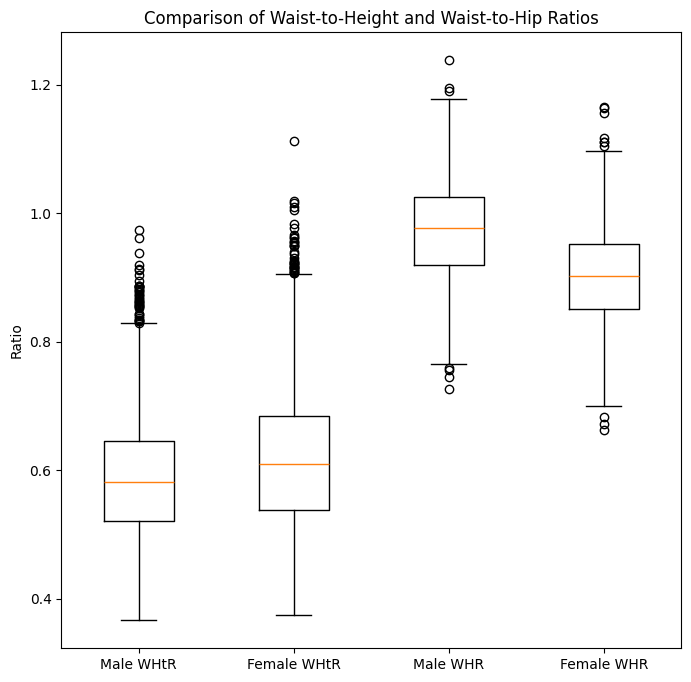

In [17]:
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
# Data for the box plot
data = [male[:, -2],female_with_bmi[:, -2], male[:, -1],female_with_bmi[:, -1]]

# Labels for the boxes
labels = ['Male WHtR', 'Female WHtR', 'Male WHR', 'Female WHR']

plt.boxplot(data, labels=labels)
plt.title('Comparison of Waist-to-Height and Waist-to-Hip Ratios')
plt.ylabel('Ratio')
plt.show()

**Observations**

**WHtR Comparison:** Both males and females show similar distributions in WHtR with slight variations in median values. The presence of outliers in both groups indicates individuals with higher WHtR values.

**WHR Comparison:** Males tend to have higher WHR values (median around 0.90) compared to females (median around 0.85). The variability in WHR is also notable, with outliers in both groups.



**11. In your own words, list some advantages and disadvantages of BMI, waist-to-height ratio, and waist-to-hip ratio.**

**• BMI**

**ADVANTAGES:**

**1) Easy to calculate:** BMI is a simple calculation using only height and weight, making it widely accessible.

**2) Widely used and understood:** BMI is a standard measure used by healthcare professionals and researchers, making it easy to compare and interpret results.

**3) Correlates with health risks:** BMI generally correlates with body fat and health risks associated with obesity, such as heart disease and diabetes.

**DISADVANTAGES:**

**1) Doesn't distinguish between muscle and fat:** BMI doesn't differentiate between muscle mass and fat mass, potentially misclassifying muscular individuals as overweight or obese.

**2) Not accurate for all populations:** BMI may not be accurate for certain groups, such as athletes, older adults, or people with different ethnicities.

**3) Doesn't reflect body fat distribution:** BMI doesn't consider where body fat is stored, which can be an important factor in health risks.

**• WHtR (Waist-to-Height Ratio)**

**ADVANTAGES:**

**1) Better predictor of health risks:** WHtR is considered a better predictor of health risks than BMI, as it takes into account abdominal fat, which is linked to increased health risks.

**2) Simple to measure:** WHtR is easy to measure with a tape measure and can be used for people of different ages and ethnicities.

**3) Easy to interpret:** WHtR has a simple guideline: keep your waist circumference to less than half your height.

**DISADVANTAGES:**

**1) Less widely used:** WHtR is not as widely used as BMI, so there may be less data and research available for comparison.

**2) May not be accurate for all body types:** WHtR may not be accurate for individuals with very short or very tall statures.

**• WHR (Waist-to-Hip Ratio)**

**ADVANTAGES:**

**1) Assesses body fat distribution:** WHR specifically measures the distribution of fat around the waist and hips, which is an important indicator of health risks.

**2) Easy to measure:** WHR can be easily measured with a tape measure.

**3) Correlates with health risks:** WHR is linked to an increased risk of heart disease, diabetes, and other health problems.

**DISADVANTAGES:**

**1) Less widely used than BMI:** WHR is not as widely used as BMI, so there may be less data available for comparison.

**2) May not be accurate for all body types:** WHR may not be as accurate for individuals with very large or very small hips.

**• These are some advantages and disadvantages of BMI, waist-to-height ratio, and waist-to-hip ratio.**

**12. Print out the standardised body measurements for the 5 persons with the lowest BMI and the 5 persons with the 5 highest BMI (e.g., call print for a subset of zfemale comprised of 10 chosen rows as determined by a call to numpy.argsort). Interpret the results.**

In [18]:
# Get the index of the BMI column in zfemale
bmi_column_index = 7

# Find indices of 5 lowest and 5 highest BMI values
lowest_bmi_indices = np.argsort(zfemale[:, bmi_column_index])[:5]
highest_bmi_indices = np.argsort(zfemale[:, bmi_column_index])[-5:]

# Print the standardized body measurements for selected persons
print("Standardized Body Measurements for 5 Persons with Lowest BMI:\n", zfemale[lowest_bmi_indices])
print("\nStandardized Body Measurements for 5 Persons with Highest BMI:\n", zfemale[highest_bmi_indices])

Standardized Body Measurements for 5 Persons with Lowest BMI:
 [[-2.0795282  -1.22284445 -1.54785032 -1.1688276  -2.19444948 -2.04033488
  -1.94191331 -2.05000256 -2.05000262]
 [-1.87992672 -0.18926859 -1.71834889  0.38666041 -2.44402948 -1.85470068
  -2.05687552 -1.9946423  -1.99464225]
 [-1.5364265   1.80709026  0.62600653  0.57331897 -2.26575805 -1.67546767
  -1.70624078 -1.97064622 -1.97064622]
 [-1.84279156 -0.26006146 -0.22648635  0.51109945 -2.30141234 -2.25157379
  -1.85569165 -1.94153833 -1.94153833]
 [-1.61069682  0.88678299 -0.09861242  0.47998969 -2.21227663 -1.82909597
  -1.71198889 -1.89295818 -1.89295821]]

Standardized Body Measurements for 5 Persons with Highest BMI:
 [[ 4.2473745   0.29212291  1.86212121 -0.98216904  2.36929911  4.10479704
   3.81769338  4.39672487  4.39672482]
 [ 4.45625977  0.50450151  1.69162264 -1.13771784  3.34979198  3.98317464
   2.90374381  4.4622444   4.46224439]
 [ 4.34949618  0.27796433  2.84248803  1.94214841  4.36593913  3.91916285
   3.7